## Handle the missiing data of given dataset (''hr.csv') also create 2 ML models and compare them 
- Classification problem: Logistic, SVM
- Target(y): left(coloumn)
- Features remaining

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Feature engineering 
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, QuantileTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ignore Warning
import sys
import warnings
warnings.filterwarnings("ignore")

In [149]:
df= pd.read_csv('hr.csv')

In [150]:
# look at 5 random objects in the dataset to understand, what`s inside
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
3953,0.79,0.97,6,113,2,1,0,0,product_mng,medium,NaN
1109,0.74,0.94,4,157,2,0,0,0,sales,medium,NaN
9193,0.63,0.94,3,172,3,0,0,0,management,medium,NaN
9977,0.51,0.54,4,166,4,1,0,0,sales,low,NaN
5329,0.83,0.96,5,275,5,0,1,0,support,low,NaN


In [151]:
df.shape

(15004, 11)

In [152]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                      object
promotion_last_5years      int64
Department                object
salary                    object
age                      float64
dtype: object

In [153]:
# check data types and NaNs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In [154]:
# check statistics of numeric features
print(df.describe())

       satisfaction_level  last_evaluation  number_project  \
count        15004.000000     15004.000000    15004.000000   
mean             0.612871         0.716096        3.802919   
std              0.248628         0.171163        1.232550   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          15004.000000        15004.000000   15004.000000   
mean             201.044655            3.497934       0.144561   
std               49.937662            1.460012       0.351670   
min               96.000000            2.000000       0.000000   
25%              156.000000            3.000000       0.000000   
50%              200.000000            3.0000

In [155]:
df.isnull().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

## Missing data

In [156]:
percent = (df.isnull().sum()/ df.shape[0])*100
missingData = pd.DataFrame(round(percent,2), columns= ['PercentMissingData'])
missingData

,PercentMissingData
satisfaction_level,0.00
last_evaluation,0.00
number_project,0.00
average_montly_hours,0.00
time_spend_company,0.00
Work_accident,0.00
left,0.00
promotion_last_5years,0.00
Department,0.00
salary,0.19


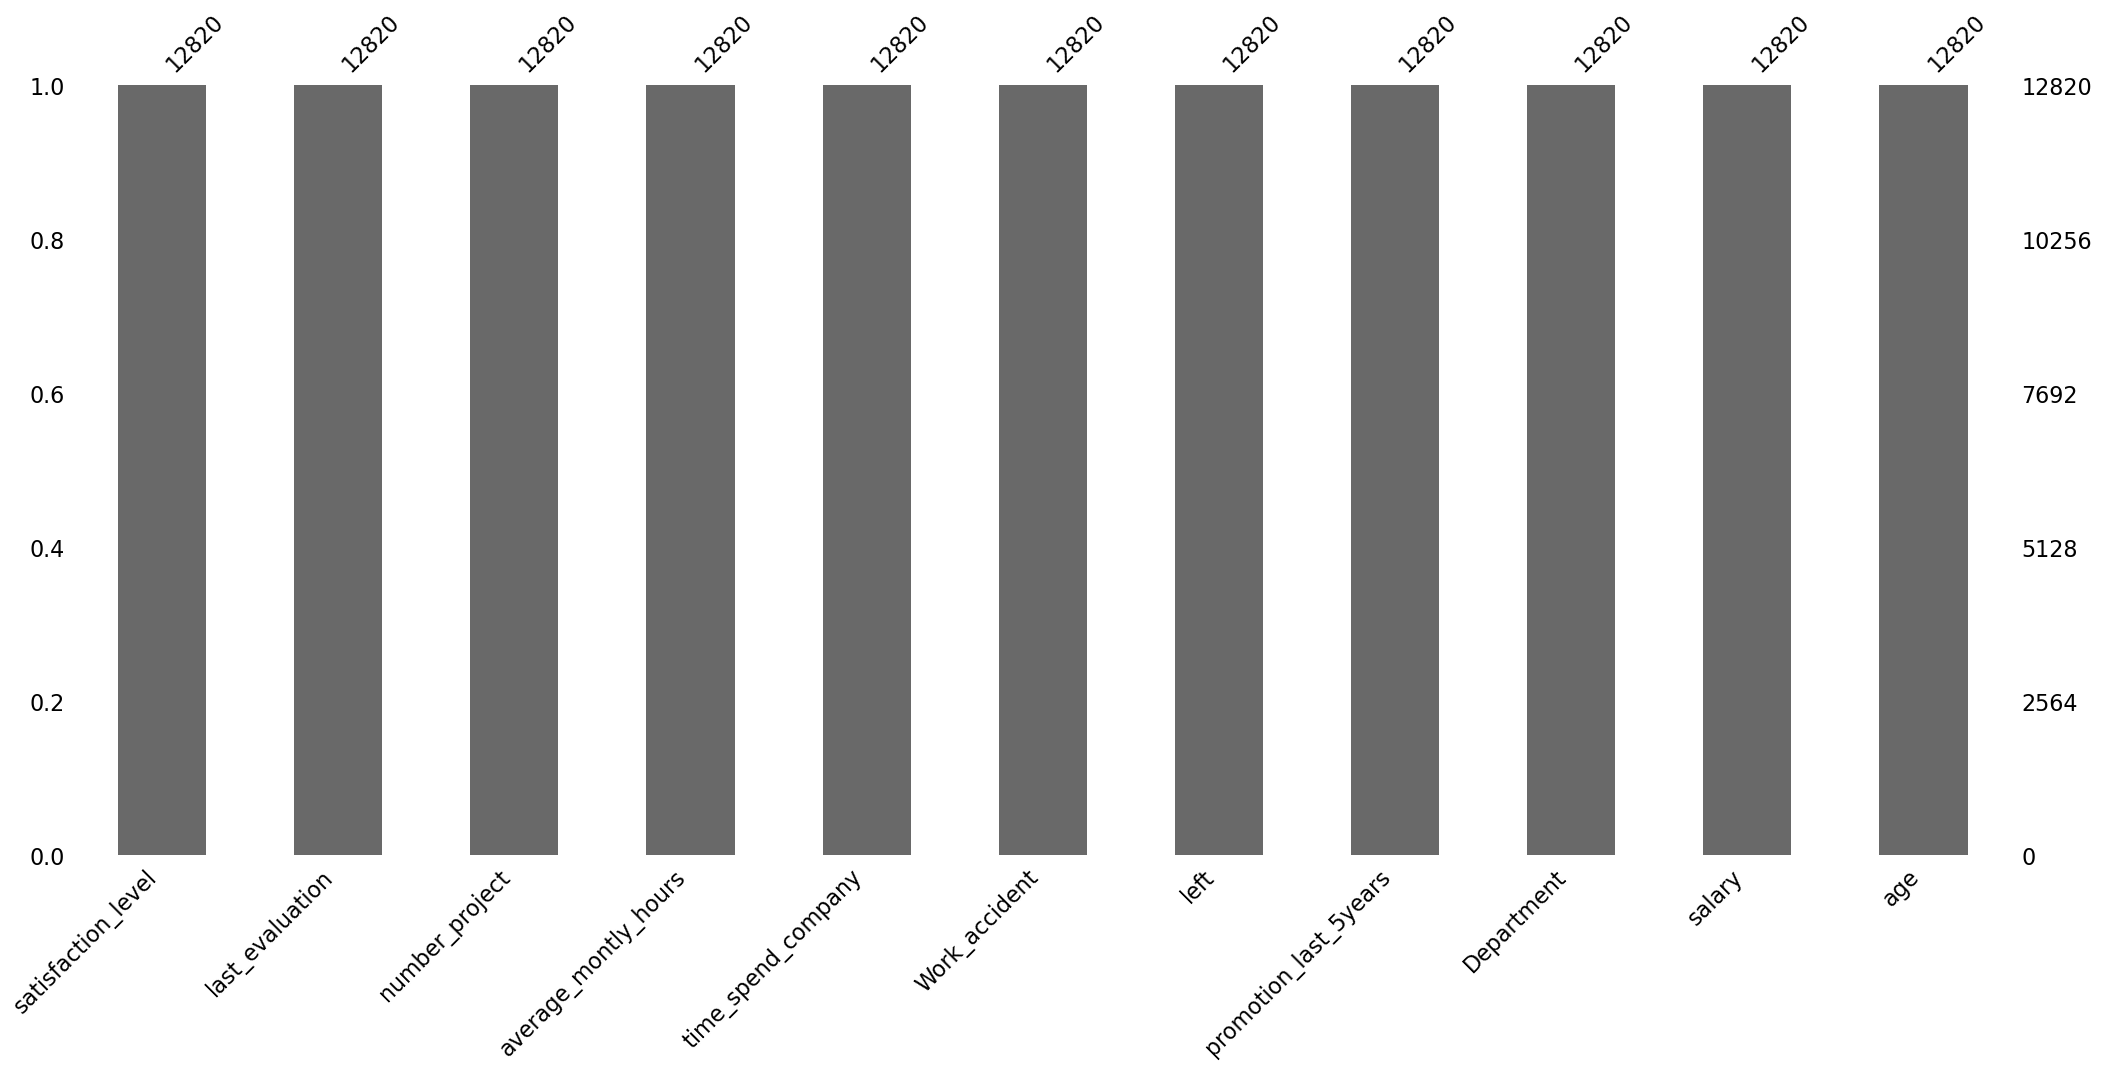

In [157]:
import missingno as msno
msno.bar(df_no_duplicates)
plt.show()

## Imputation

- The other way to handle numeric data is to fill the columns. We can use a test static like mean/median/mode to fill in, depending on the kind of value that the column holds.

By checking the skewness and presence of outliers in the data we can decide whether to to fill with mean or median.

Whenever a graph falls on a normal distribution, using the mean is a good choice. But if our data has extreme values, we will need to look at median, because it gives a better representative number for our sample.

Also, presence of outliers has a major effect on the mean, so in that case using median is a better choice

## CATEGORICAL VALUES

Categorical values need to be treated differently. One way is to check the most frequent values in a particular column and fill the column with that value.

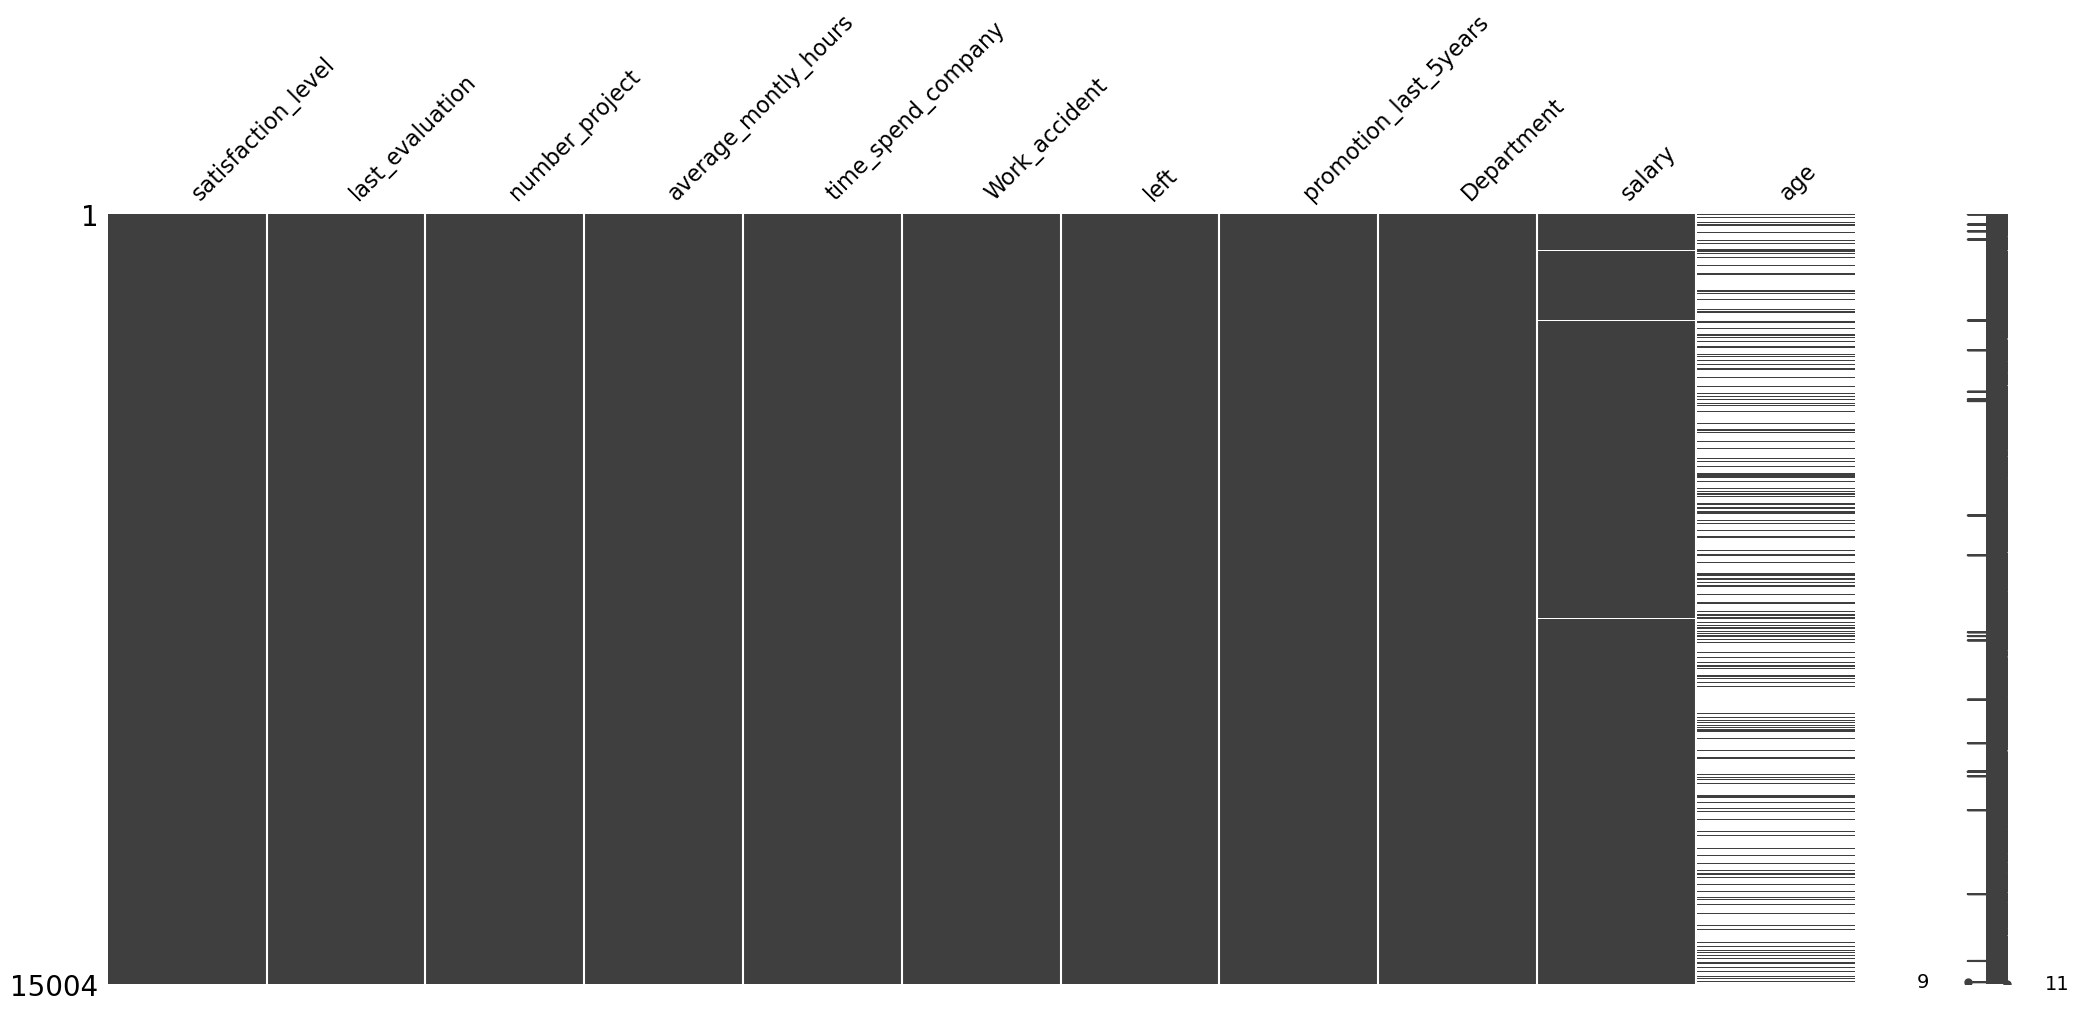

In [158]:
msno.matrix(df)
plt.show()

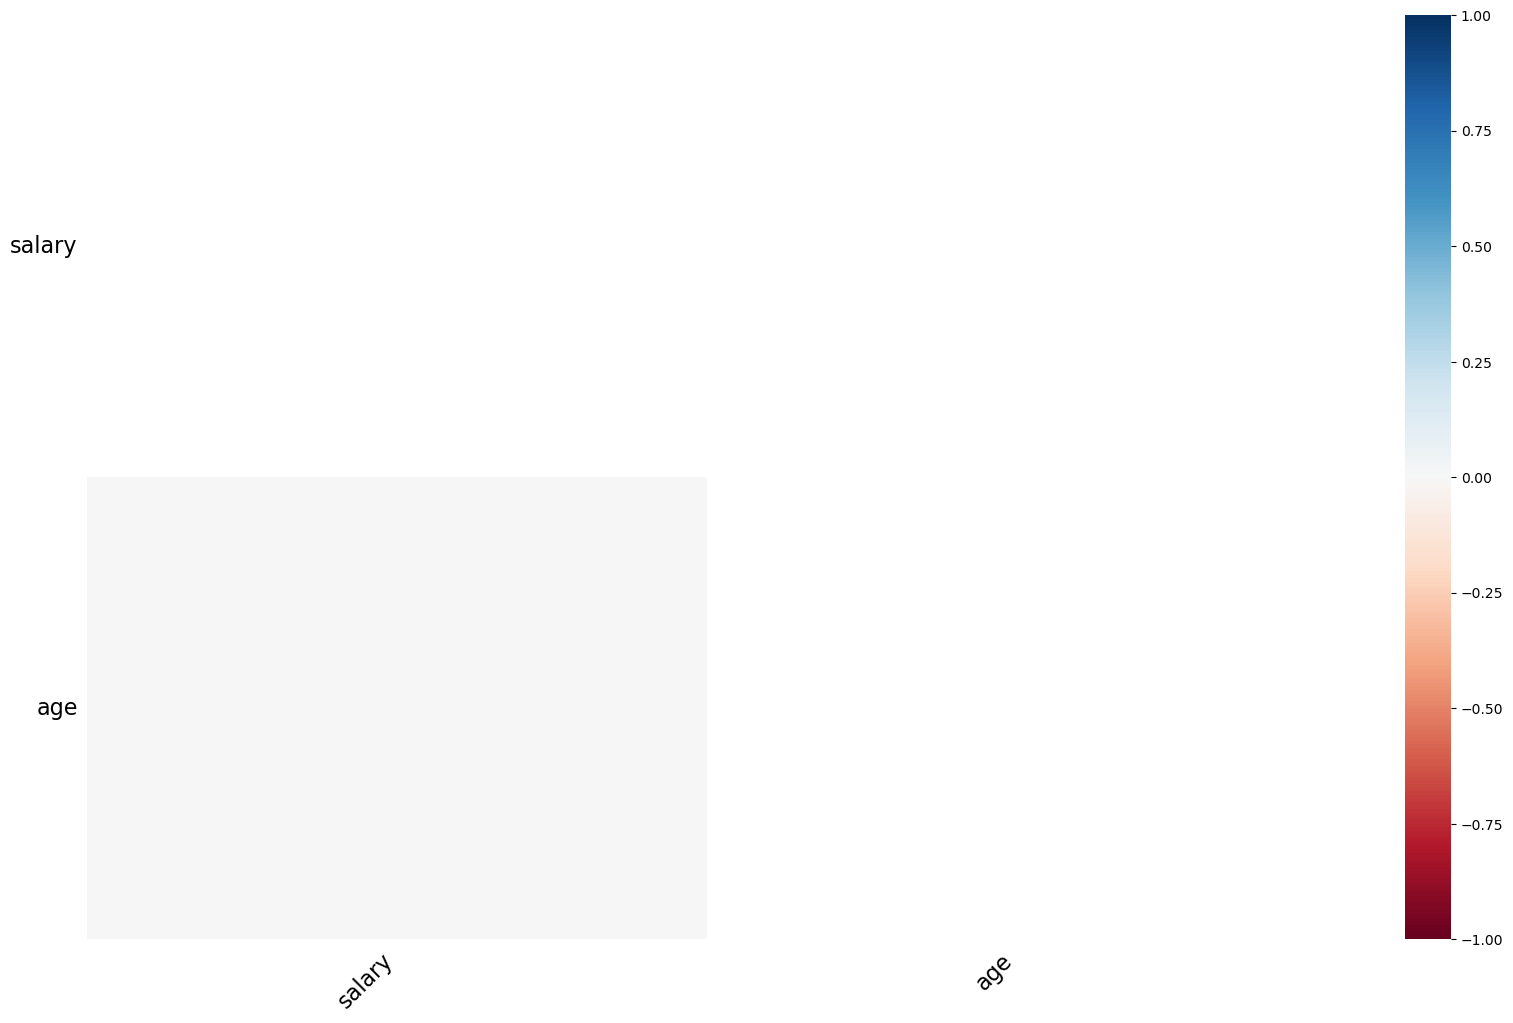

In [159]:
msno.heatmap(df)
plt.show()

- When missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category. If the number of missing values is very large then it can be replaced with a new category

In [160]:
df['age'] = df['age'].fillna(df['age'].value_counts().index[0])


In [161]:
df.isnull().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
Department                0
salary                   29
age                       0
dtype: int64

### Imputation of categorical class missing values
- In the case of a categorical feature 'salary'. the slary feature of the this hr dataset is categorical. Here, we cannot compute mean and median. So, we can fill the missing values with the mode or most frequently occurring class/category.

In [162]:
df['salary'] = df['salary'].fillna(df['salary'].value_counts().index[0])

In [163]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
age                      0
dtype: int64

## Checking and removing duplicates

In [164]:
df.duplicated().any()

True

In [165]:
df.duplicated().sum()

2184

In [166]:
# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Remove duplicates based on all columns
df_no_duplicates = df.drop_duplicates()

#Resetting index to re-arrange the indexing
df_no_duplicates = df_no_duplicates.reset_index(drop=True)

# Display the DataFrame after removing duplicates and re-arranging the index
print("\nDataFrame after removing duplicates and re-arranging the index:")
print(df_no_duplicates)

Original DataFrame:
       satisfaction_level  last_evaluation  number_project  \
0                    0.24             0.79               2   
1                    0.40             0.49               2   
2                    0.45             0.45               2   
3                    0.46             0.73               6   
4                    0.14             0.54               5   
...                   ...              ...             ...   
14999                0.71             0.66               5   
15000                0.75             0.84               3   
15001                0.32             0.41               3   
15002                0.62             0.58               3   
15003                0.81             0.94               3   

       average_montly_hours  time_spend_company  Work_accident left  \
0                       175                   5              0    0   
1                       155                   3              0    1   
2                     

In [167]:
df_no_duplicates['time_spend_company'].value_counts()

time_spend_company
3     5542
2     3011
4     2145
5     1167
6      587
10     142
7      123
8      103
Name: count, dtype: int64

### Univaraite analysis

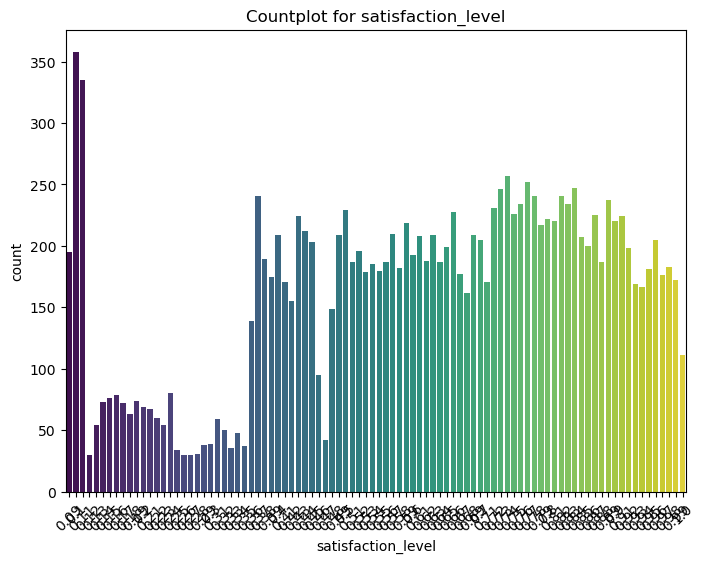

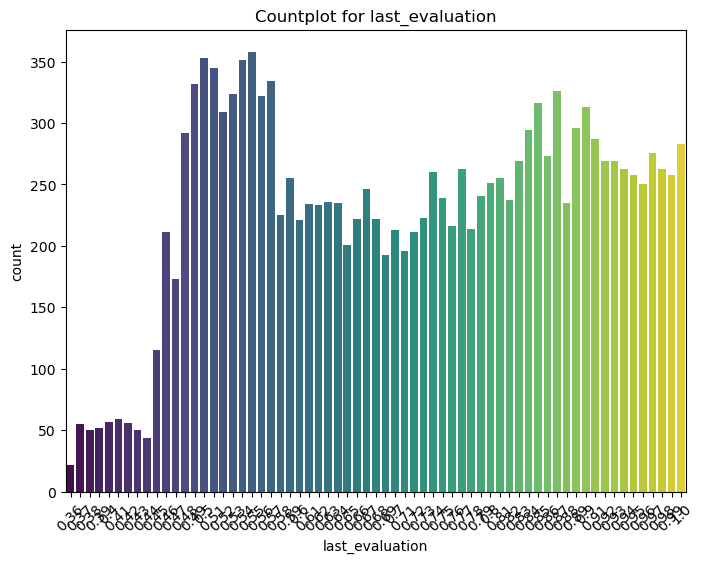

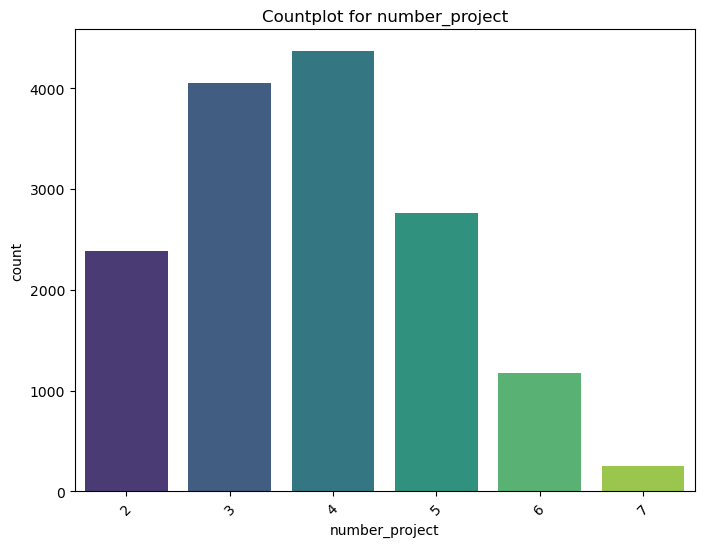

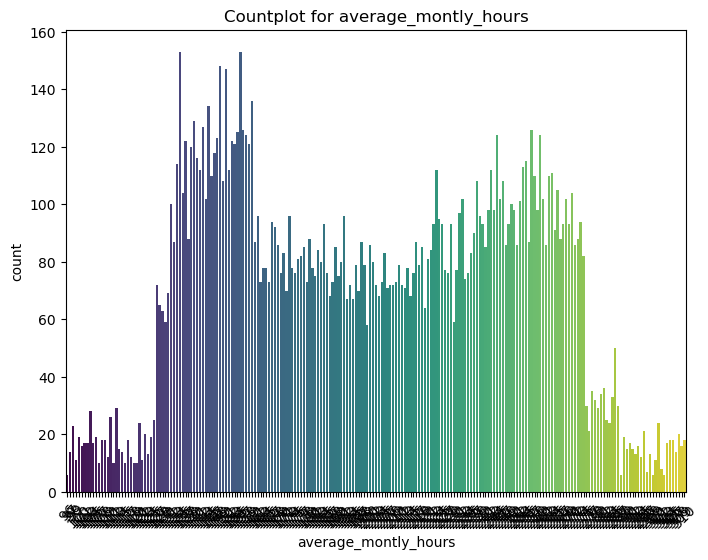

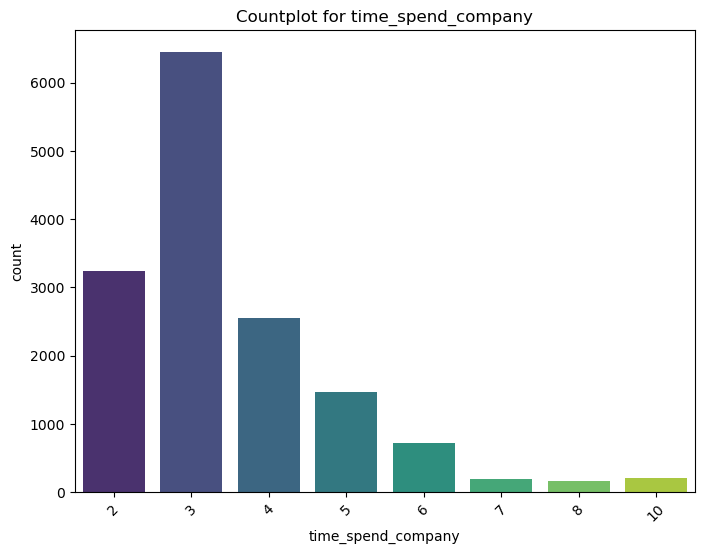

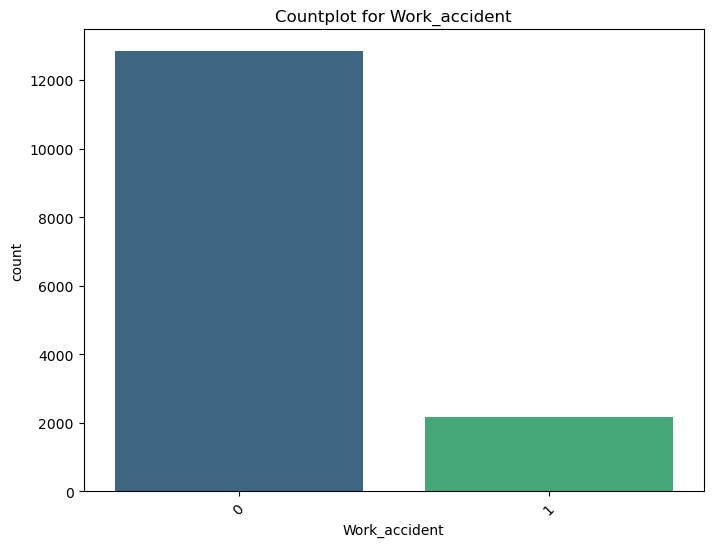

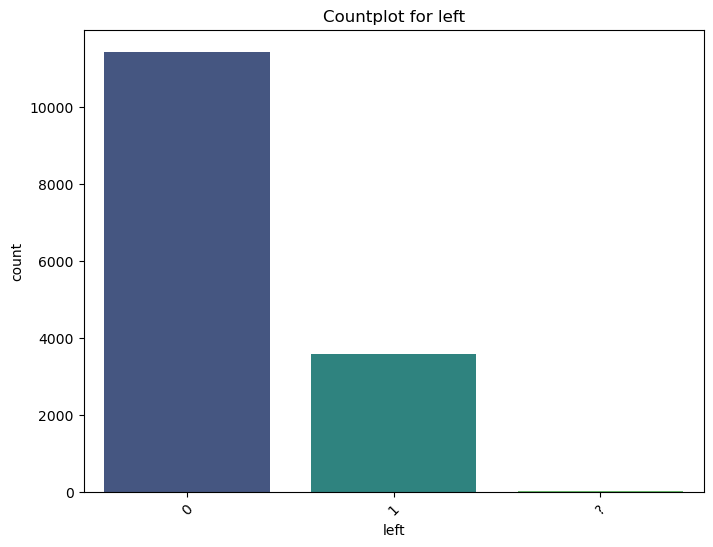

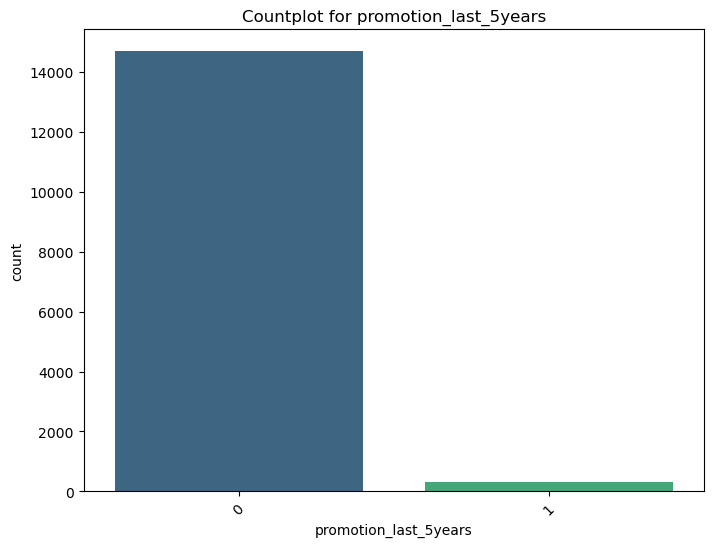

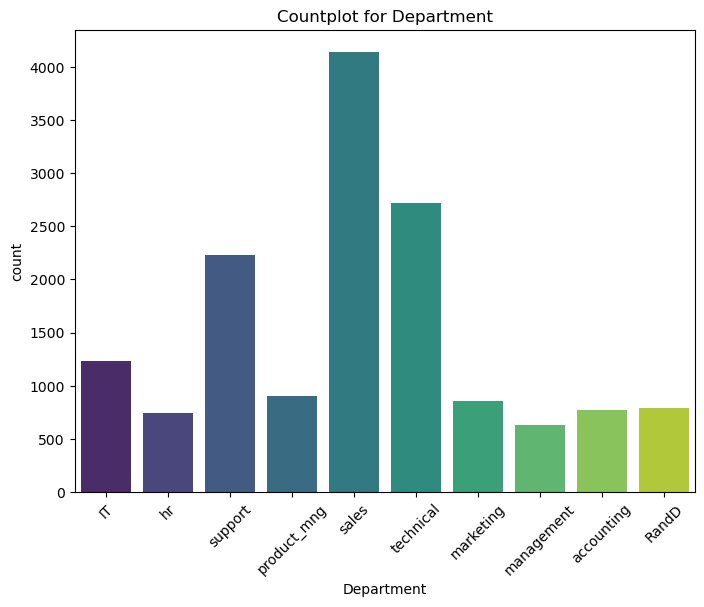

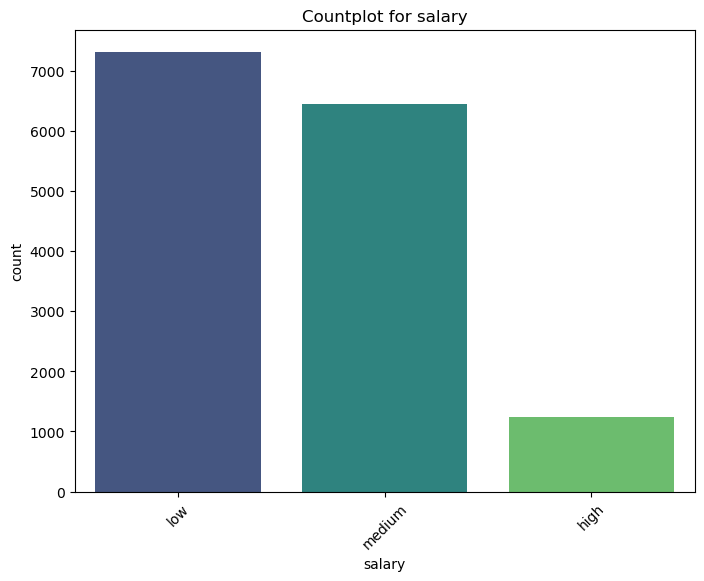

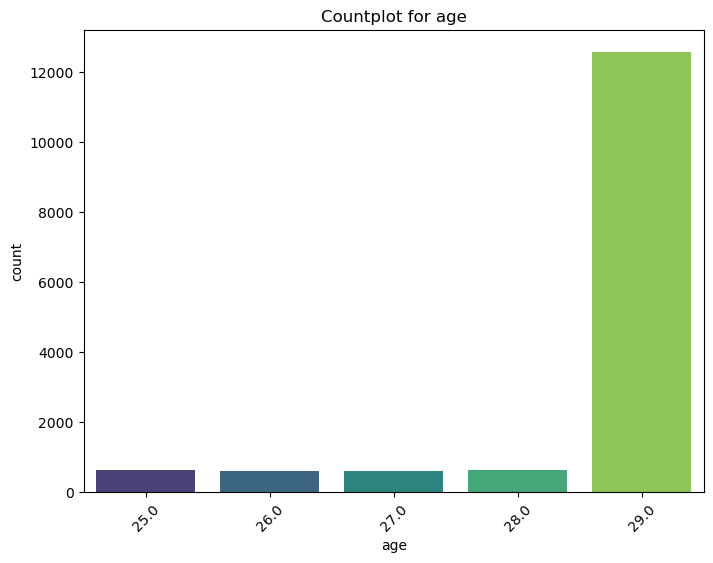

In [168]:
# see distributions of all features just by using countplot
for col in df.columns:
    plt.figure(figsize=(8, 6)) 
    sns.countplot(data=df, x=col, palette='viridis')  
    plt.title(f'Countplot for {col}')  
    plt.xticks(rotation=45)  
    plt.show()

## More precise look at categorical features¶

In [169]:
# check cardinality of 'Department':, we can use OHEncoder
df_no_duplicates['Department'].unique()

array(['IT', 'hr', 'support', 'product_mng', 'sales', 'technical',
       'marketing', 'management', 'accounting', 'RandD'], dtype=object)

In [170]:
# check values of 'salary': LabelEncoder can be used, because it`s ordinal values
df_no_duplicates['salary'].unique() 

array(['low', 'medium', 'high'], dtype=object)

In [171]:
# check cardinality of all features: all features with cardinality <= 10 are categorical (objects or discreet numeric values)
unique_counts = pd.DataFrame.from_records([(col, df_no_duplicates[col].nunique()) for col in df.columns],
                                         columns=['col_name', 'unique']).sort_values(by=['unique'])
unique_counts

,col_name,unique
5,Work_accident,2
7,promotion_last_5years,2
6,left,3
9,salary,3
10,age,5
2,number_project,6
4,time_spend_company,8
8,Department,10
1,last_evaluation,65
0,satisfaction_level,92


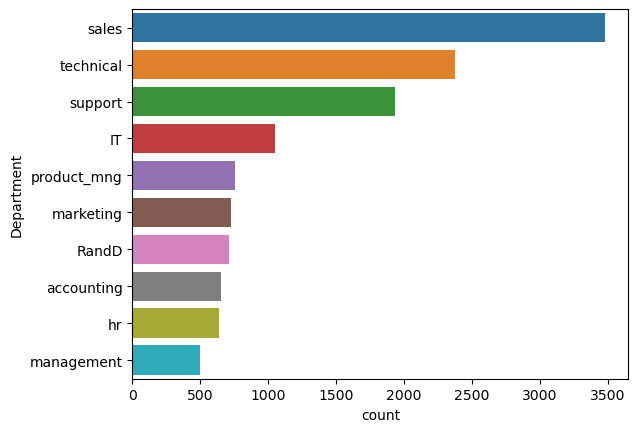

In [172]:
# check balance of 'Department'
%matplotlib inline
sns.countplot(y='Department', data=df_no_duplicates,orient='v', 
                   order=df_no_duplicates['Department'].value_counts().index)
plt.show()

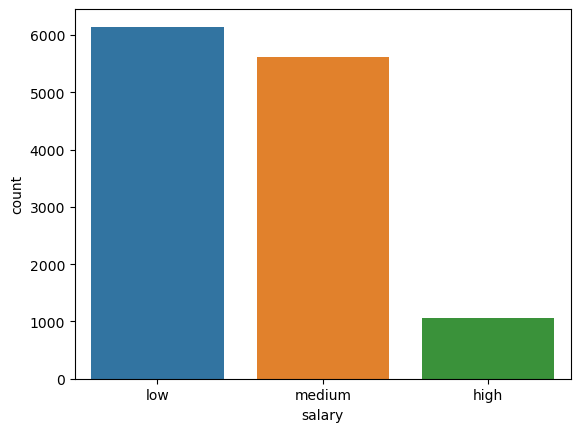

In [173]:
# check same for 'salary'
sns.countplot(x='salary', data=df_no_duplicates,orient='h', 
                   order=df_no_duplicates['salary'].value_counts().index)
plt.show()

## Explore correlations between all features and target

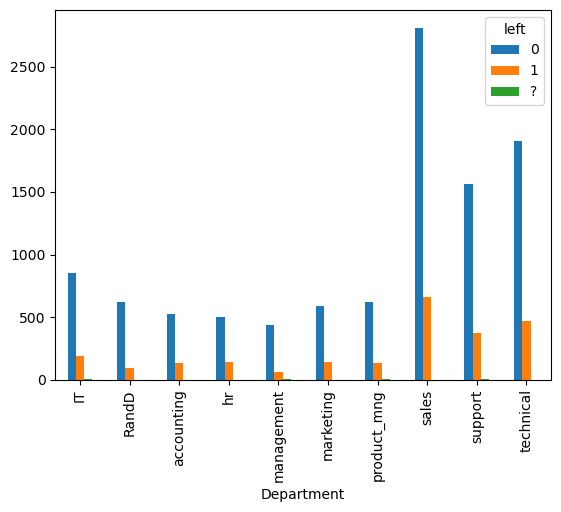

In [174]:
# visualize for better understanding
pd.crosstab(df_no_duplicates['Department'], df_no_duplicates['left'], values=df_no_duplicates['left'], aggfunc='count').plot(kind='bar')
plt.show()

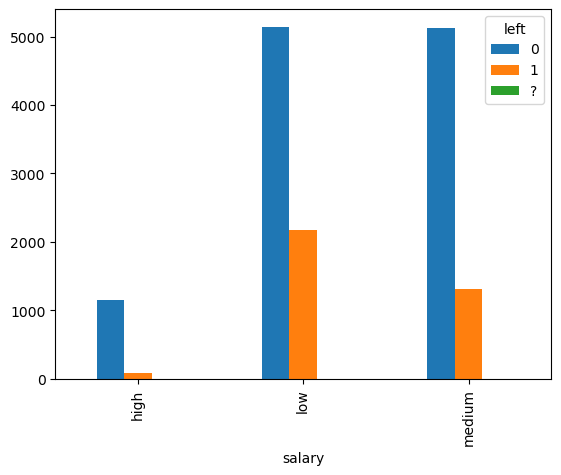

In [175]:
pd.crosstab(df['salary'], df['left'], values=df['salary'], aggfunc='count').plot(kind='bar')
plt.show()

In [176]:
df_no_duplicates.corr(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age
satisfaction_level,1.000000,0.097420,-0.137219,-0.013533,-0.139275,0.048161,0.023341,0.026711
last_evaluation,0.097420,1.000000,0.294228,0.288713,0.105315,-0.007297,-0.010790,0.001838
number_project,-0.137219,0.294228,1.000000,0.359307,0.191500,-0.005795,-0.008215,-0.012210
average_montly_hours,-0.013533,0.288713,0.359307,1.000000,0.106545,-0.011407,-0.007344,-0.004134
time_spend_company,-0.139275,0.105315,0.191500,0.106545,1.000000,0.000626,0.060535,-0.030784
Work_accident,0.048161,-0.007297,-0.005795,-0.011407,0.000626,1.000000,0.033516,0.011272
promotion_last_5years,0.023341,-0.010790,-0.008215,-0.007344,0.060535,0.033516,1.000000,-0.010050
age,0.026711,0.001838,-0.012210,-0.004134,-0.030784,0.011272,-0.010050,1.000000


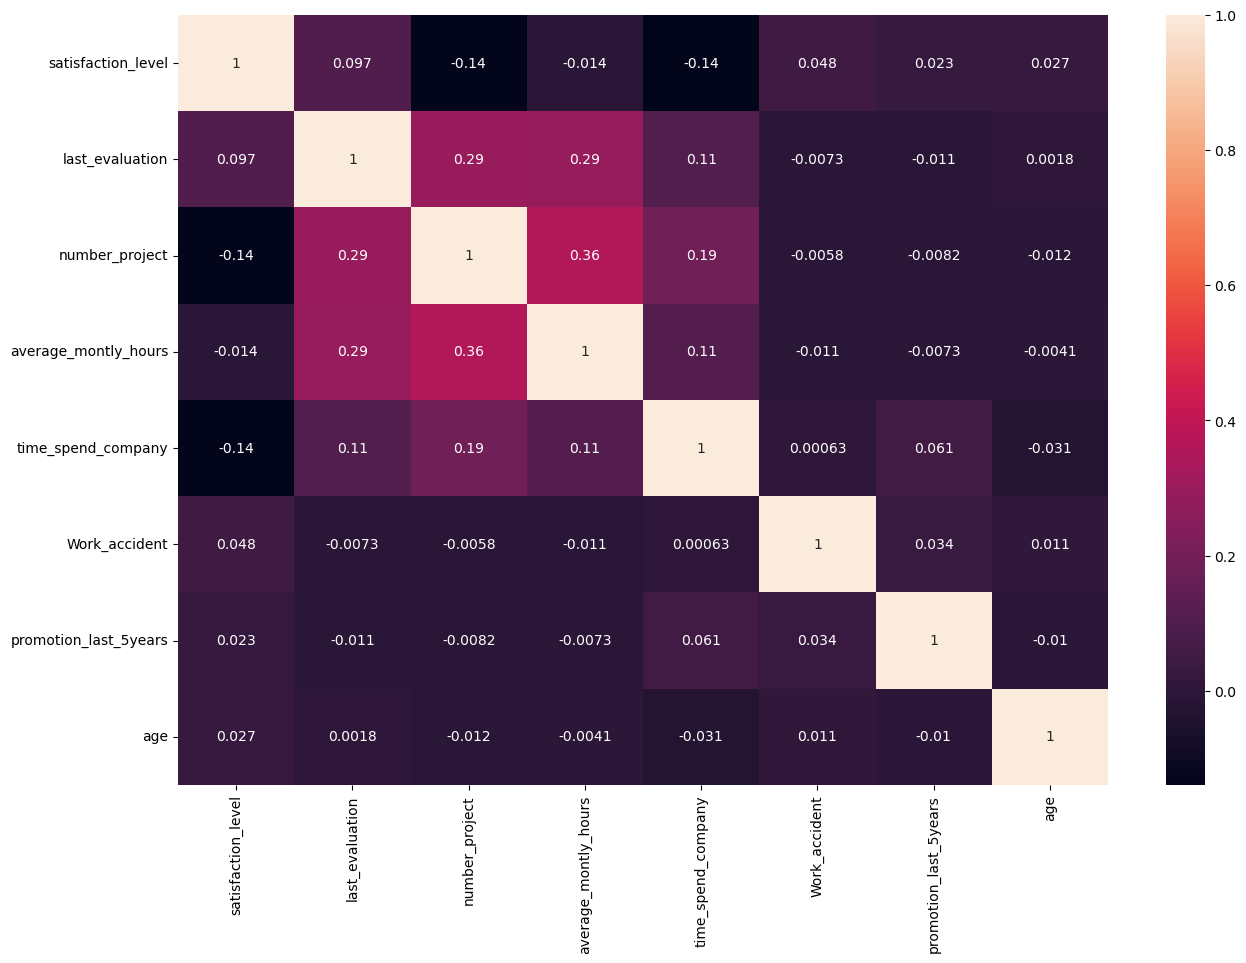

In [177]:
# check correlations between all numeric features and target: none of features have too strong correlations
plt.figure(figsize=(15,10))
sns.heatmap(df_no_duplicates.corr(numeric_only=True), annot=True)
plt.show()

## Preprocessing
#### Dealing with categorical features

In [178]:
# hardcode of LabelEncoder for salary (to keep correct ordinality)
df_no_duplicates['salary'].replace(['high', 'medium', 'low'], [3, 2, 1], inplace=True)

In [179]:
df_no_duplicates.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,1,29.0
1,0.40,0.49,2,155,3,0,1,0,hr,2,27.0
2,0.45,0.45,2,154,3,1,1,0,support,2,29.0


In [180]:
# just for safety fillna in 'Department' with 'RandD' and script to replace new possible values
df_no_duplicates['Department'].fillna('RandD', inplace=True)

In [181]:
known_deps = ['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD']
df_no_duplicates['Department'] = df_no_duplicates['Department'].apply(lambda x: x if x in known_deps else 'RandD') 

In [182]:
from sklearn.preprocessing import OneHotEncoder

In [183]:
# encode 'Department' with OneHotEncoder and convert column names to str 
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df_no_duplicates[['Department']]).toarray())
final_df = df_no_duplicates.join(encoder_df)
final_df.columns = final_df.columns.astype(str)
final_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,0,1,2,3,4,5,6,7,8,9
0,0.24,0.79,2,175,5,0,0,0,IT,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40,0.49,2,155,3,0,1,0,hr,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.45,0.45,2,154,3,1,1,0,support,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.46,0.73,6,256,4,0,0,0,product_mng,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.14,0.54,5,275,4,1,0,0,sales,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12815,0.95,0.65,5,182,3,0,0,0,marketing,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12816,0.75,0.84,3,145,3,1,0,0,support,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12817,0.32,0.41,3,138,3,1,0,0,technical,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12818,0.62,0.58,3,148,2,1,0,0,technical,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [184]:
# drop original 'Department' and 9th column (there is enough data in cols 0-8)
final_df.drop(['Department', '9'], axis=1 ,inplace=True)

### Deal with numerical features
- Unluckly distribution of features 'satisfaction_level', 'last_evaluation' and 'average_monthly_hours' is close to uniform, there is nothing we can do to make them closer to normal and it is not that bad. The only feature wich is close to normal and can be fitted to normal distribution is 'number_project', but it is discreet and i don`t think that it can really affect perfomance of our model (btw it can be done using log())

## Split dataset

In [185]:
X = final_df
y = X.pop('left')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

## Scaling
- It is important to note that scaling has to be done after splitting dataset into train-val-test If we use MinMaxScaler() from sklearn, first of all we have to use fit_transform() for train and transform() for val and test

In [186]:
from sklearn.preprocessing import MinMaxScaler

In [187]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [188]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,29.0
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,29.0
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,29.0
4,0.14,0.54,5,275,4,1,0,0,sales,high,29.0


## Model

In [189]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [190]:
model.fit(X_train,y_train)

LogisticRegression()

In [191]:
model.predict(X_test)

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [192]:
model.score(X_test,y_pred)*100

92.70670826833073

In [200]:
accuracy_score(y_test,y_pred)

0.8030421216848674

In [201]:
from sklearn.svm import SVC
model2 = SVC()

In [202]:
model2.fit(X_train,y_train)

SVC()

In [203]:
y_pred= model2.predict(X_test)

In [205]:
accuracy_score(y_test,y_pred)*100

80.30421216848674